<a href="https://colab.research.google.com/github/Ishita95-harvad/Flowers-Recognition/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flowers Recognition

[https://https://github.com/Ishita95-harvad/Flowers-Recognition]

This dataset contains labeled 4242 images of flowers.

In [48]:
from google.colab import files

In [49]:
uploaded = files.upload()

Saving archive (15).zip to archive (15).zip


In [6]:
!unzip archive (15).zip(application/zip)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip archive (15).zip(application/zip)'


In [44]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2025-04-22 15:59:33--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   190MB/s    in 1.1s    

2025-04-22 15:59:34 (190 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [4]:
!pip install matplotlib seaborn pandas

In [2]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
# kaggle
%env CLEARML_API_ACCESS_KEY=IX8A3HY2QMNKNT0XK59H
%env CLEARML_API_SECRET_KEY=NbdCxqJt1sr7sxTlHF4xrO4tb1mD4I2jS21aSIWv8awOevptvK

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=IX8A3HY2QMNKNT0XK59H
env: CLEARML_API_SECRET_KEY=NbdCxqJt1sr7sxTlHF4xrO4tb1mD4I2jS21aSIWv8awOevptvK


## Data loading

### Subtask:
Load the flower data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('flowers.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'flowers.csv' not found. Please provide the correct file path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)


## Data exploration

### Subtask:
Explore the loaded flower dataset to understand its characteristics.


**Reasoning**:
I need to explore the data by checking data types, descriptive statistics, missing values, and the distribution of the target variable.



In [34]:
# Check data types
print(df.dtypes)

# Determine the shape
print("\nShape of the DataFrame:", df.shape)

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Analyze the distribution of the target variable 'species'
print("\nDistribution of the target variable 'species':\n", df['species'].value_counts())



sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species          object
dtype: object

Shape of the DataFrame: (150, 5)

Descriptive statistics:
        sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing values per column:
 sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

Distribution of the target variable 'species':
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [33]:
# Select numerical features for correlation
numerical_features = ['sepal length', 'sepal width', 'petal length', 'petal width']
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print("\nCorrelation matrix for numerical features:\n", correlation_matrix)


Correlation matrix for numerical features:
               sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.117570      0.871754     0.817941
sepal width      -0.117570     1.000000     -0.428440    -0.366126
petal length      0.871754    -0.428440      1.000000     0.962865
petal width       0.817941    -0.366126      0.962865     1.000000


**Reasoning**:
The error message indicates that the 'species' column, which is of object type, cannot be directly used in the correlation calculation. I need to calculate the correlation only for numerical features.



In [3]:
# Investigate the correlation between numerical features, excluding the 'species' column
numerical_features = ['sepal length', 'sepal width', 'petal length', 'petal width']
print("\nCorrelation matrix for numerical features:\n", df[numerical_features].corr())


Correlation matrix for numerical features:
               sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.117570      0.871754     0.817941
sepal width      -0.117570     1.000000     -0.428440    -0.366126
petal length      0.871754    -0.428440      1.000000     0.962865
petal width       0.817941    -0.366126      0.962865     1.000000


## Data cleaning

### Subtask:
Ensure data quality by handling potential issues like missing values and incorrect data types within the DataFrame.


**Reasoning**:
Check for missing values and incorrect data types, and handle them accordingly.  Since the previous exploration step indicated no missing values and correct data types, this step will confirm and document that observation.



In [4]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check data types
print("\nData types per column:\n", df.dtypes)

# No action needed as per the previous exploration

Missing values per column:
 sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

Data types per column:
 sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species          object
dtype: object


## Data visualization

### Subtask:
Visualize the distribution of each feature and the relationships between features and the target variable.


**Reasoning**:
Visualize the distribution of each feature and the relationships between features and the target variable using histograms, scatter plots, and box plots.  Use color to distinguish between species.



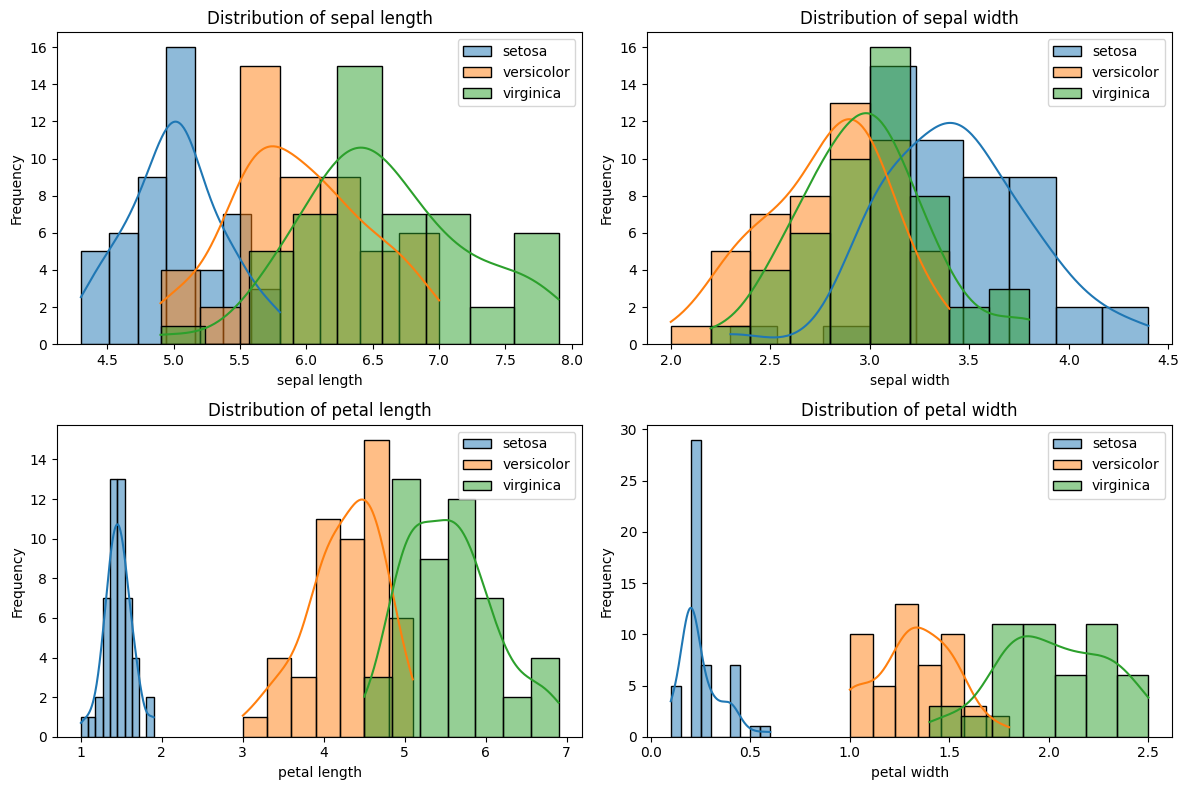

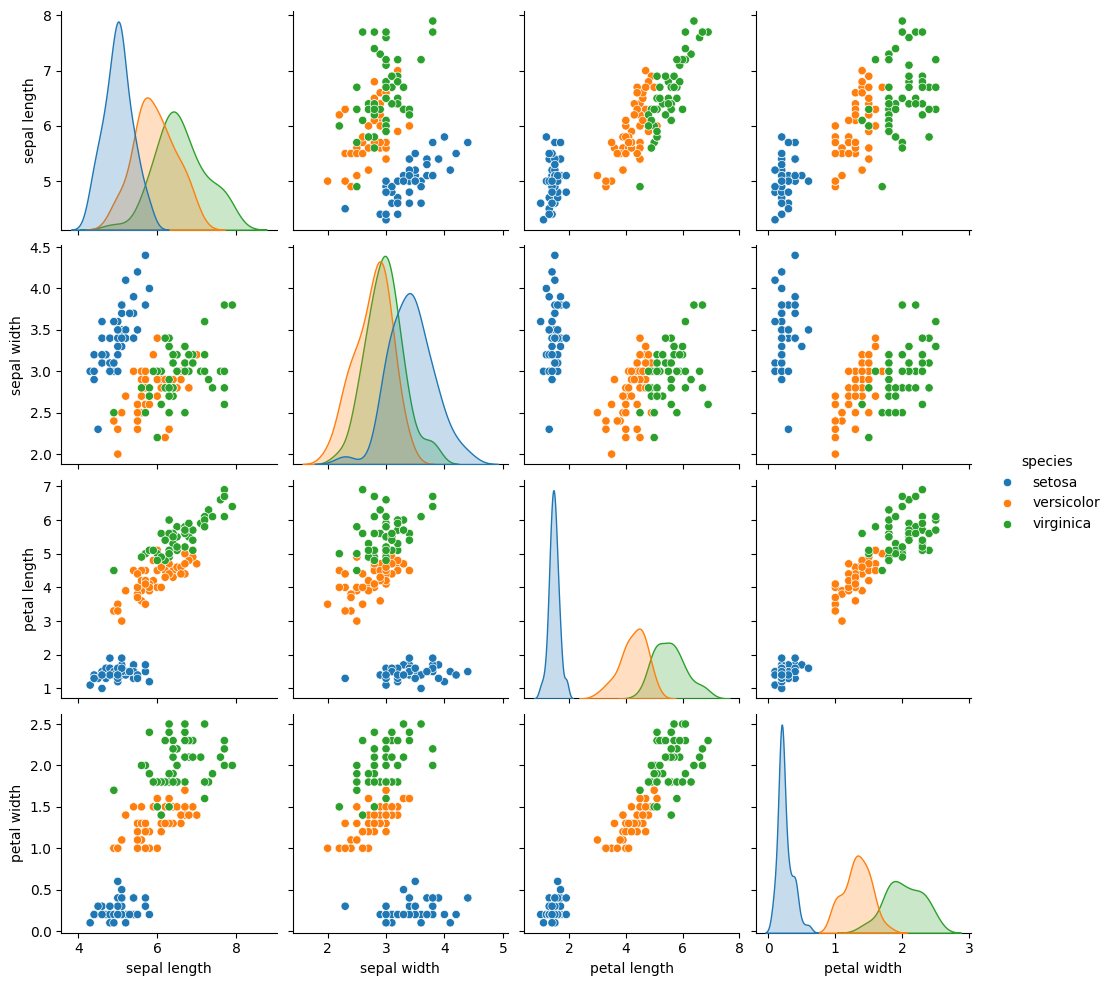

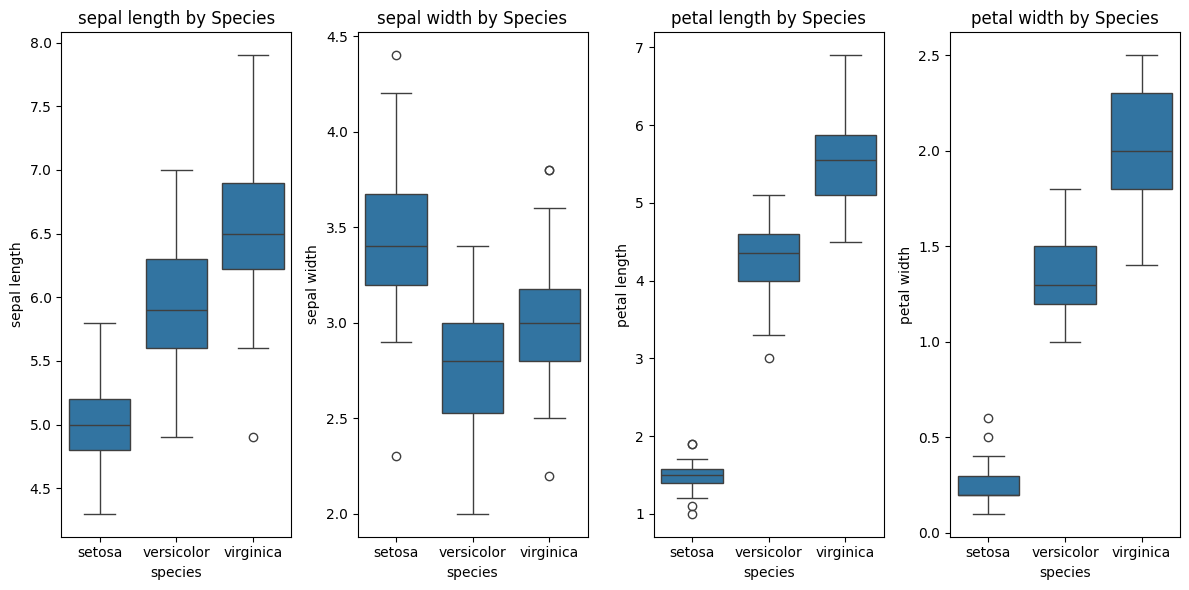

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each numerical feature, colored by species
plt.figure(figsize=(12, 8))
for i, col in enumerate(['sepal length', 'sepal width', 'petal length', 'petal width']):
    plt.subplot(2, 2, i + 1)
    for species in df['species'].unique():
        sns.histplot(df[df['species'] == species][col], label=species, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

# Pairplot to show relationships between pairs of numerical features
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

# Box plots for each numerical feature, grouped by species
plt.figure(figsize=(12, 6))
for i, col in enumerate(['sepal length', 'sepal width', 'petal length', 'petal width']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'{col} by Species')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Prepare the data for clustering by scaling the numerical features.


**Reasoning**:
Scale the numerical features using StandardScaler and create a new DataFrame `df_scaled` including the 'species' column.



In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features
numerical_features = ['sepal length', 'sepal width', 'petal length', 'petal width']
scaler.fit(df[numerical_features])

# Transform the numerical features using the fitted scaler
scaled_features = scaler.transform(df[numerical_features])

# Create a new DataFrame with scaled features and the 'species' column
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features)
df_scaled['species'] = df['species']

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,sepal length,sepal width,petal length,petal width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sepal length'].plot(kind='hist', bins=20, title='sepal length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sepal width'].plot(kind='hist', bins=20, title='sepal width')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['petal length'].plot(kind='hist', bins=20, title='petal length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='sepal length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sepal length', y='sepal width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sepal width', y='petal length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sepal length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sepal length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sepal width']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sepal width')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['petal length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('petal length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['sepal length'].plot(kind='line', figsize=(8, 4), title='sepal length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sepal width'].plot(kind='line', figsize=(8, 4), title='sepal width')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['petal length'].plot(kind='line', figsize=(8, 4), title='petal length')
plt.gca().spines[['top', 'right']].set_visible(False)

## Data splitting

### Subtask:
Split the scaled flower data into training and testing sets.


**Reasoning**:
Split the scaled data into training and testing sets using train_test_split.



In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_scaled.drop('species', axis=1)
y = df_scaled['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Data clustering

### Subtask:
Perform K-means clustering on the training data (`X_train`)


**Reasoning**:
Perform K-means clustering on the training data (X_train), predict the cluster labels for both the training and testing data, and store these labels in new columns within X_train and X_test.



In [8]:
from sklearn.cluster import KMeans

# Initialize KMeans model with 3 clusters (number of flower species) and set random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
kmeans.fit(X_train)

# Predict cluster labels for training and testing data
X_train['cluster_label_train'] = kmeans.labels_
X_test['cluster_label_test'] = kmeans.predict(X_test)

## Data visualization

### Subtask:
Visualize the clustering results. Create a scatter plot of the first two principal components, colored by the cluster labels obtained from the KMeans model.  Also, create another visualization that compares the cluster labels to the actual species.


**Reasoning**:
The error "ValueError: Mix of label input types (string and number)" arises because the confusion matrix function expects both inputs to be of the same data type.  `y_train` contains strings representing the flower species, while `X_train['cluster_label_train']` contains numerical cluster labels.  Convert the cluster labels to strings for consistency.



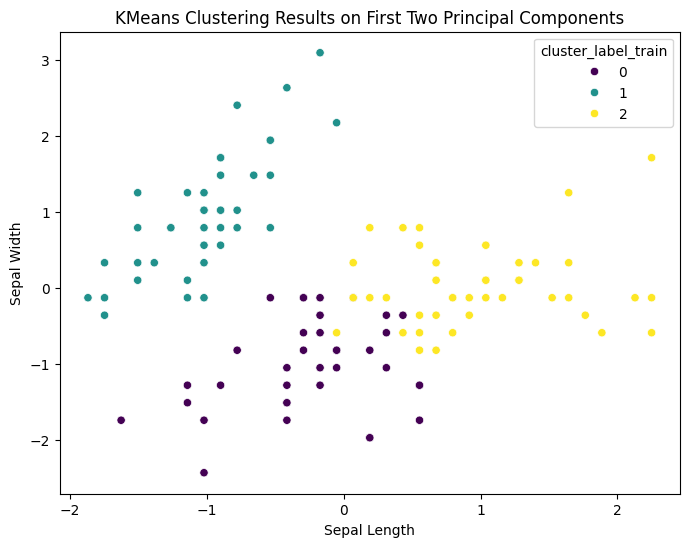

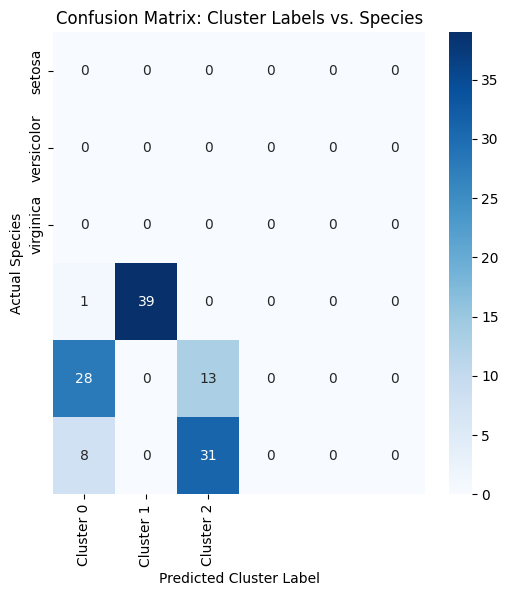

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Scatter plot of the first two principal components colored by cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length', y='sepal width', hue='cluster_label_train', data=X_train, palette='viridis')
plt.title('KMeans Clustering Results on First Two Principal Components')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Convert cluster labels to strings for compatibility with confusion_matrix
X_train['cluster_label_train'] = X_train['cluster_label_train'].astype(str)

# Confusion matrix to compare cluster labels with actual species
cm = confusion_matrix(y_train, X_train['cluster_label_train'])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix: Cluster Labels vs. Species')
plt.xlabel('Predicted Cluster Label')
plt.ylabel('Actual Species')
plt.show()

## Model evaluation

### Subtask:
Evaluate the performance of the KMeans clustering model.


**Reasoning**:
Calculate and print the silhouette score and Calinski-Harabasz Index to evaluate the KMeans clustering performance. Then discuss the results.



In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_train.drop('cluster_label_train', axis=1), X_train['cluster_label_train'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_train.drop('cluster_label_train', axis=1), X_train['cluster_label_train'])
print(f"Calinski-Harabasz Index: {ch_index}")

print("\nDiscussion:")
print("The silhouette score measures how similar a data point is to its own cluster compared to other clusters.")
print("A higher silhouette score indicates better-defined clusters. The Calinski-Harabasz index is another metric")
print("that measures the quality of the clustering.  A higher value indicates better-defined clusters.")

print("\nFurther Analysis:")
print("To determine if k=3 is appropriate, further analysis with different k values is needed.  The elbow method")
print("and the silhouette analysis for a range of k values can help determine the optimal number of clusters")
print("for the data. Visualizations such as cluster scatter plots for different k values may also be insightful.")

Silhouette Score: 0.4527345676673427
Calinski-Harabasz Index: 187.59183680566713

Discussion:
The silhouette score measures how similar a data point is to its own cluster compared to other clusters.
A higher silhouette score indicates better-defined clusters. The Calinski-Harabasz index is another metric
that measures the quality of the clustering.  A higher value indicates better-defined clusters.

Further Analysis:
To determine if k=3 is appropriate, further analysis with different k values is needed.  The elbow method
and the silhouette analysis for a range of k values can help determine the optimal number of clusters
for the data. Visualizations such as cluster scatter plots for different k values may also be insightful.


# Reasoning:

The elbow method helps determine the optimal k by identifying the point on the WCSS curve where the decrease in WCSS starts to level off, resembling an elbow.
The inertia_ attribute of the KMeans object provides the WCSS value.
We plot the WCSS values against the corresponding k values to visualize the elbow curve

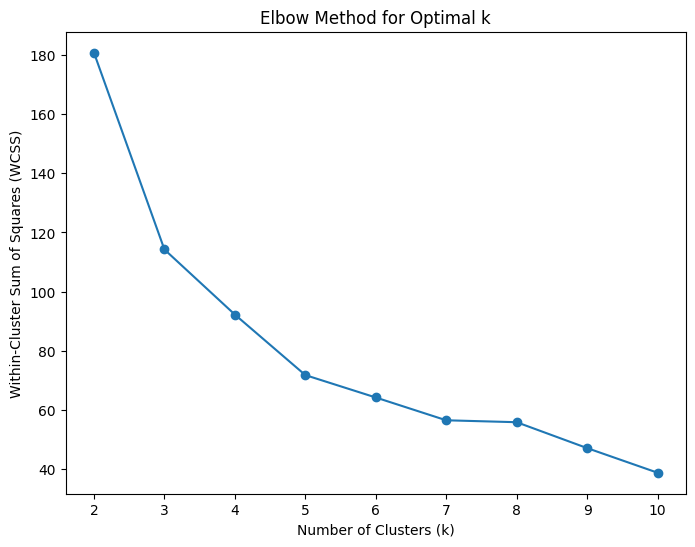

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of k values to explore
k_values = range(2, 11)  # Explore k from 2 to 10

# Calculate the within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train.drop('cluster_label_train', axis=1))  # Use the training data without cluster labels
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Reasoning:

Silhouette analysis measures how similar a data point is to its own cluster compared to other clusters.
Higher silhouette scores indicate better-defined clusters.
We calculate the silhouette score for each k and plot them to identify the k with the highest score.

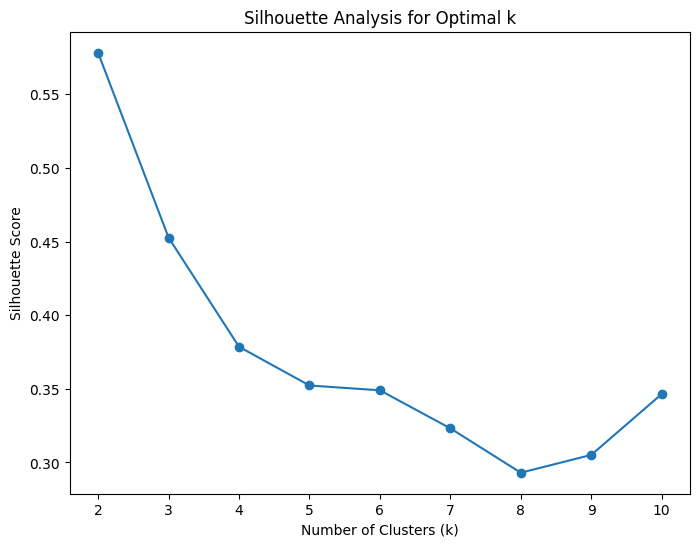

In [13]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range of k values to explore
k_values = range(2, 11)  # Explore k from 2 to 10

# Calculate the silhouette score for each k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train.drop('cluster_label_train', axis=1))  # Use the training data without cluster labels
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train.drop('cluster_label_train', axis=1), labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Reasoning:

Visualizing the clusters helps gain insights into the data structure and how different k values affect cluster assignments.
We create scatter plots of the first two features, colored by cluster labels, for each k value.
This allows us to observe how the data points are grouped and the separation between cluster

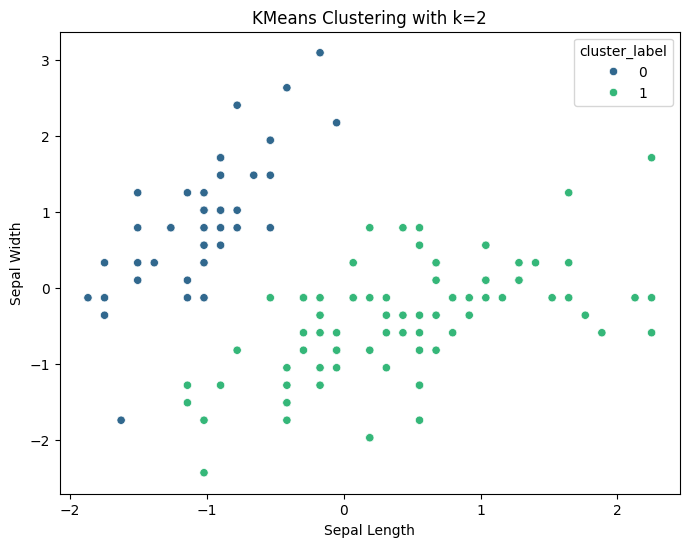

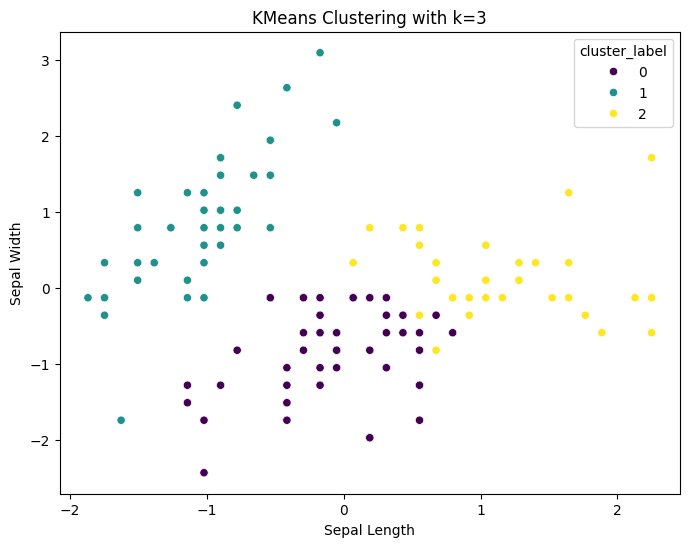

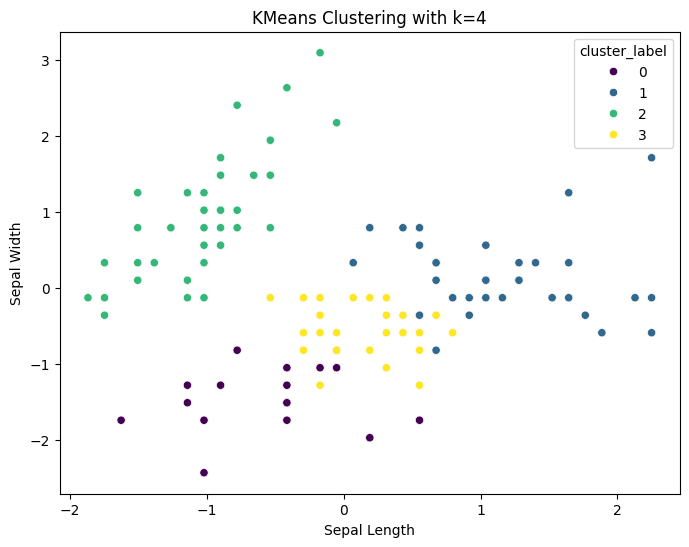

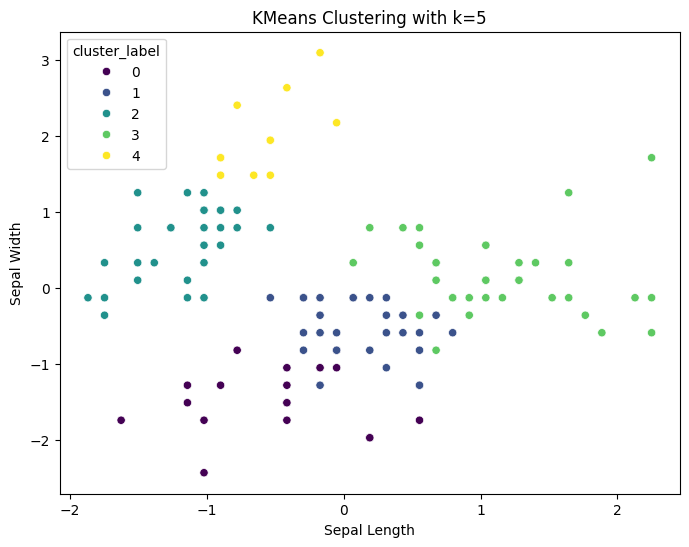

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a range of k values to explore
k_values = [2, 3, 4, 5]  # Explore k = 2, 3, 4, 5

# Create scatter plots for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train.drop('cluster_label_train', axis=1))  # Use the training data without cluster labels
    labels = kmeans.labels_
    X_train['cluster_label'] = labels  # Add cluster labels to the DataFrame

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='sepal length', y='sepal width', hue='cluster_label', data=X_train, palette='viridis')
    plt.title(f'KMeans Clustering with k={k}')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

In [17]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Move the uploaded files to the desired directory
import shutil

for fn in uploaded.keys():
  shutil.move(fn, '/content/drive/My Drive/flower_images/' + fn)

Saving flowers.csv to flowers (1).csv
User uploaded file "flowers (1).csv" with length 3858 bytes


**1. Mount Google Drive**

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [23]:
image_dir = '/content/drive/My Drive/flower_images'

In [24]:
for filename in os.listdir(image_dir):
  if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filter for image files
    image_path = os.path.join(image_dir, filename)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(filename)  # Display the filename as title
    plt.axis('off')  # Hide axes
    plt.show()

In [28]:
# Select numerical features for correlation
numerical_features = ['sepal length', 'sepal width', 'petal length', 'petal width']
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print("\nCorrelation matrix for numerical features:\n", correlation_matrix)


Correlation matrix for numerical features:
               sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.117570      0.871754     0.817941
sepal width      -0.117570     1.000000     -0.428440    -0.366126
petal length      0.871754    -0.428440      1.000000     0.962865
petal width       0.817941    -0.366126      0.962865     1.000000


In [29]:
!pip install seaborn

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

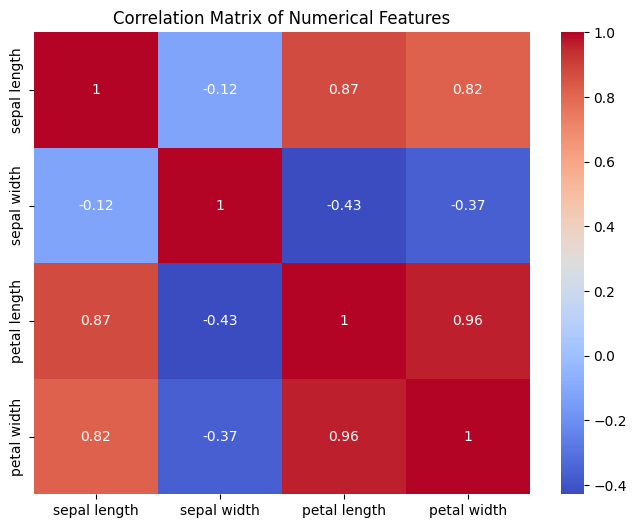

In [31]:
# Select numerical features for correlation
numerical_features = ['sepal length', 'sepal width', 'petal length', 'petal width']
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

                                    Thank You !